In [19]:
# Importing Librairies

from google.colab import drive
drive.mount('/content/drive')

# Data Handling
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Models
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

# Lasso Regularization
#from sklearn.linear_model import Lasso
#from sklearn.feature_selection import SelectFromModel
#from sklearn.preprocessing import StandardScaler

# Stats
#from scipy.stats import pearsonr, spearmanr
#import numpy as np
from sklearn.metrics import mean_squared_error

# Models
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Importing Datasets

path = "/content/drive/MyDrive/"

train_ds = pd.read_csv(path + "Past_Students.csv").drop('Serial_No', axis=1) # Dropping Student Serial No., irrelevant
test_ds = pd.read_csv(path + "Graduating_Class.csv")

In [10]:
# Test Train Split

X_ds = train_ds[['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
y_ds = train_ds['Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X_ds, y_ds, test_size=0.25)


In [16]:
# Continuous to Binary Output

y_train_binary = y_train.map(lambda x: 1 if x>= 0.5 else 0)

157    1
224    1
144    1
124    1
322    1
      ..
13     1
41     0
126    1
325    1
143    1
Name: Chance_of_Admit, Length: 262, dtype: int64

In [21]:
# Cross Validation with Lasso Regularization (l1)

# Defining the model

param_grid = {
    'kernel' : {'linear', 'poly', 'rbf'},
    'gamma' : {'scale', 'auto'}
}

scoring = mean_squared_error

SVC_mdl = SVC(
    probability=True
)

scores = cross_validate(SVC_mdl, X_train, y_train_binary, scoring=scoring)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/usr/local/lib/python3.8

In [22]:
scores

{'fit_time': array([0.01676083, 0.01399612, 0.01967764, 0.02022338, 0.01625919]),
 'score_time': array([0.00103545, 0.00256538, 0.00073171, 0.00512719, 0.00305891]),
 'test_score': array([nan, nan, nan, nan, nan])}

# ARCHIVE

In [ ]:
# Finding interaction variables

# SOP * LOR

X_train["SOP X LOR"] = X_train["SOP"] * X_train["LOR"]
X_train["Scores"] = X_train["GRE_Score"] * X_train["TOEFL_Score"] * X_train["CGPA"]
X_valid["Scores"] = X_valid["GRE_Score"] * X_valid["TOEFL_Score"] * X_valid["CGPA"]

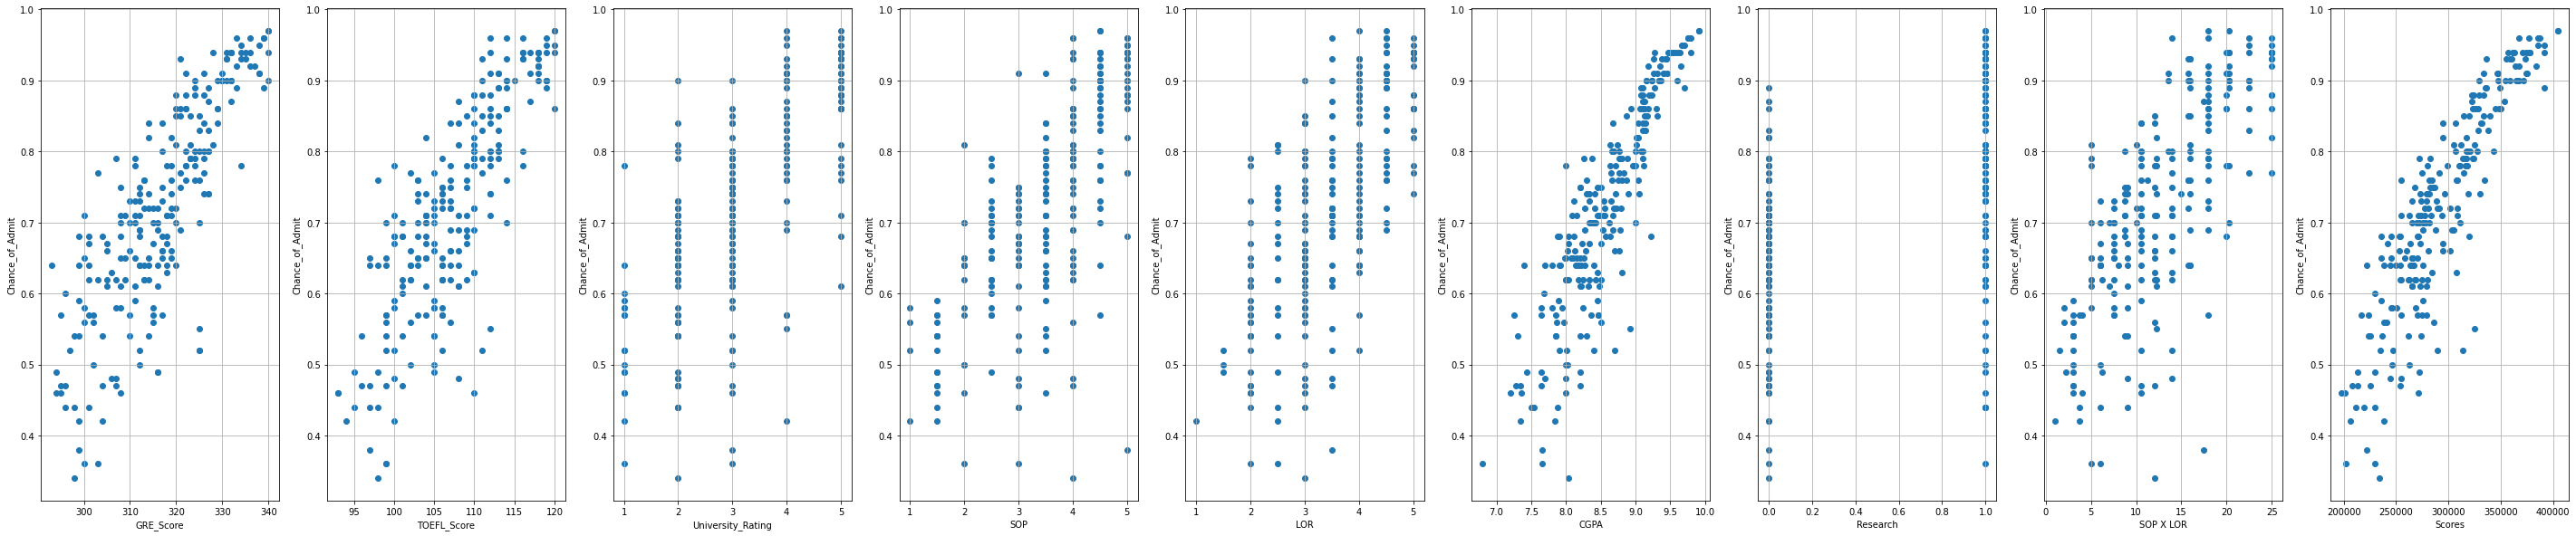

In [ ]:
# Data Visualization

Columns = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'SOP X LOR', 'Scores']

plt.rcParams['figure.figsize'] = (50, 10)

for i in range(len(Columns)):
  plt.subplot(1, len(Columns), i+1)
  
  X = Columns[i]
  plt.xlabel(X)
  plt.ylabel('Chance_of_Admit')
  plt.scatter(X_train[X], y_train)
  plt.grid()

# Statistical Significance of Feature and Label

## Pearson Correlation
- Measure of the linear correlation between two sets of numeric data

## Spearman Correlation
- Similar to Pearson correlation, but can measure non-linear relationships between variables
- Still requires the relationship to be monotonic

## Correlation Ratio
- Measure of the correlation between a categorical column and a numeric column
- Unable to measure the direction of the correlation, can only measure its magnitude
- Good for Research column

In [ ]:
def correlation_ratio(categorical_feature, numeric_feature):
    # From https://www.turintech.ai/four-methods-to-statistically-measure-your-data-correlation/

    cats, freqs = np.unique(categorical_feature, return_counts=True)
    numeric_mean = np.mean(numeric_feature)
    sig_y_bar = 0

    for i in range(len(cats)):
        category_mean = np.mean(numeric_feature[categorical_feature == cats[i]])
        sig_y_bar += np.square(category_mean - numeric_mean) * freqs[i]
        
    sig_y = np.sum(np.square(numeric_feature - numeric_mean))
    statistic = np.sqrt(sig_y_bar / sig_y)

    return statistic

In [ ]:
# Correlation

for i in range(len(Columns)):
  X = Columns[i]

  print("------------------------------\n")

  print("Pearson Correlation for: " + X)
  print("%.2f" % (pearsonr(X_train[X], y_train)[0]))
  print()

  print("Spearman Correlation for: " + X)
  print("%.2f" % (spearmanr(X_train[X], y_train)[0]))
  print()

  if X == 'Research':
    print("Correlation Ratio for: " + X)
    print("%.2f" % (correlation_ratio(X_train[X], y_train)))

  print("\n------------------------------\n")

------------------------------

Pearson Correlation for: GRE_Score
0.82

Spearman Correlation for: GRE_Score
0.83


------------------------------

------------------------------

Pearson Correlation for: TOEFL_Score
0.81

Spearman Correlation for: TOEFL_Score
0.81


------------------------------

------------------------------

Pearson Correlation for: University_Rating
0.72

Spearman Correlation for: University_Rating
0.73


------------------------------

------------------------------

Pearson Correlation for: SOP
0.69

Spearman Correlation for: SOP
0.71


------------------------------

------------------------------

Pearson Correlation for: LOR
0.68

Spearman Correlation for: LOR
0.69


------------------------------

------------------------------

Pearson Correlation for: CGPA
0.89

Spearman Correlation for: CGPA
0.89


------------------------------

------------------------------

Pearson Correlation for: Research
0.53

Spearman Correlation for: Research
0.55

Correlation R

In [ ]:
# Only keeping GRE, TOEFL, CGPA

X_train_filtered = X_train[['GRE_Score', 'TOEFL_Score', 'CGPA']]
X_valid_filtered = X_valid[['GRE_Score', 'TOEFL_Score', 'CGPA']]

#X_train_filtered = X_train[["Scores"]]
#X_valid_filtered = X_valid[["Scores"]]

# Algorithms to Try
1) Random Forest

2) Decision Tree

3) Support Vector Machine

4) K-Nearest Neighbours

In [ ]:
# Random Forest Regressor

rf = RandomForestRegressor(n_estimators=100, random_state=100)
rf.fit(X_train_filtered, y_train)

RandomForestRegressor(random_state=100)

In [ ]:
rf.score(X_valid_filtered, y_valid)

0.6194623308275551

In [ ]:
# Grid Search

param_grid = [
    {'n_estimators': [int(x) for x in np.linspace(200, 10, 2000)],
     'max_features': ['auto', 'sqrt'],
     'max_depth': [int(x) for x in np.linspace(10, 11, 110)],
     'min_samples_split': [2, 5, 10, 15],
     'min_samples_leaf': [1, 2, 4, 8],
     'bootstrap': [True, False]
    }
]

rf_random = RandomizedSearchCV(rf, param_grid, n_iter=100, cv=3, verbose=2, random_state = 100)
rf_random.fit(X_train_filtered, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=65; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=65; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=65; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=99; tota

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=100),
                   n_iter=100,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 10, 10, 10, 10, 10,
                                                       10, 10, 10, 10, 10, 10,
                                                       10, 10, 10, 10, 10, 10,
                                                       10, 10, 10, 10, 10, 10,
                                                       10, 10, 10, 10, 10, 10, ...],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 2, 4, 8],
                                         'min_samples_split': [2, 5, 10, 15],
                                         'n_estimators': [200, 199, 199, 199,
                                                          199, 199, 199, 199,
                                       

In [ ]:
rf_random.score(X_valid_filtered, y_valid)

0.6721569089915655

In [ ]:
rf_random.best_params_

{'n_estimators': 38,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}